In [115]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [116]:
from sentence_transformers import SentenceTransformer
from bertopic import BERTopic

In [117]:
df = pd.read_json("newsdata.json", lines=True)

In [118]:
df['text'] = (
    df['headline'].fillna('') + ". " +
    df['short_description'].fillna('')
).str.strip()

In [119]:
df['date'] = pd.to_datetime(df['date'], errors='coerce')

df['time_bin'] = df['date'].dt.to_period('M').dt.to_timestamp()

df.head()

,link,headline,category,short_description,authors,date,text,time_bin
0,https://www.huffpost.com/entry/covid-boosters-...,Over 4 Million Americans Roll Up Sleeves For O...,U.S. NEWS,Health experts said it is too early to predict...,"Carla K. Johnson, AP",2022-09-23,Over 4 Million Americans Roll Up Sleeves For O...,2022-09-01
1,https://www.huffpost.com/entry/american-airlin...,"American Airlines Flyer Charged, Banned For Li...",U.S. NEWS,He was subdued by passengers and crew when he ...,Mary Papenfuss,2022-09-23,"American Airlines Flyer Charged, Banned For Li...",2022-09-01
2,https://www.huffpost.com/entry/funniest-tweets...,23 Of The Funniest Tweets About Cats And Dogs ...,COMEDY,"""Until you have a dog you don't understand wha...",Elyse Wanshel,2022-09-23,23 Of The Funniest Tweets About Cats And Dogs ...,2022-09-01
3,https://www.huffpost.com/entry/funniest-parent...,The Funniest Tweets From Parents This Week (Se...,PARENTING,"""Accidentally put grown-up toothpaste on my to...",Caroline Bologna,2022-09-23,The Funniest Tweets From Parents This Week (Se...,2022-09-01
4,https://www.huffpost.com/entry/amy-cooper-lose...,Woman Who Called Cops On Black Bird-Watcher Lo...,U.S. NEWS,Amy Cooper accused investment firm Franklin Te...,Nina Golgowski,2022-09-22,Woman Who Called Cops On Black Bird-Watcher Lo...,2022-09-01


In [120]:
df = df.head(3000)


In [121]:
df

,link,headline,category,short_description,authors,date,text,time_bin
0,https://www.huffpost.com/entry/covid-boosters-...,Over 4 Million Americans Roll Up Sleeves For O...,U.S. NEWS,Health experts said it is too early to predict...,"Carla K. Johnson, AP",2022-09-23,Over 4 Million Americans Roll Up Sleeves For O...,2022-09-01
1,https://www.huffpost.com/entry/american-airlin...,"American Airlines Flyer Charged, Banned For Li...",U.S. NEWS,He was subdued by passengers and crew when he ...,Mary Papenfuss,2022-09-23,"American Airlines Flyer Charged, Banned For Li...",2022-09-01
2,https://www.huffpost.com/entry/funniest-tweets...,23 Of The Funniest Tweets About Cats And Dogs ...,COMEDY,"""Until you have a dog you don't understand wha...",Elyse Wanshel,2022-09-23,23 Of The Funniest Tweets About Cats And Dogs ...,2022-09-01
3,https://www.huffpost.com/entry/funniest-parent...,The Funniest Tweets From Parents This Week (Se...,PARENTING,"""Accidentally put grown-up toothpaste on my to...",Caroline Bologna,2022-09-23,The Funniest Tweets From Parents This Week (Se...,2022-09-01
4,https://www.huffpost.com/entry/amy-cooper-lose...,Woman Who Called Cops On Black Bird-Watcher Lo...,U.S. NEWS,Amy Cooper accused investment firm Franklin Te...,Nina Golgowski,2022-09-22,Woman Who Called Cops On Black Bird-Watcher Lo...,2022-09-01
...,...,...,...,...,...,...,...,...
2995,https://www.huffpost.com/entry/deadly-nashvill...,"4 Dead, More Than 100 Rescued After Heavy Rain...",U.S. NEWS,The deadly floodwaters follow Nashville's seco...,Nina Golgowski,2021-03-28,"4 Dead, More Than 100 Rescued After Heavy Rain...",2021-03-01
2996,https://www.huffpost.com/entry/richest-1-perce...,America's Richest 1% Dodge Taxes On More Than ...,U.S. NEWS,The money is hidden through a variety of strat...,Mary Papenfuss,2021-03-28,America's Richest 1% Dodge Taxes On More Than ...,2021-03-01
2997,https://www.huffpost.com/entry/sharon-osbourne...,Sharon Osbourne No Longer On 'The Talk',ENTERTAINMENT,CBS said that Osbourne's behavior toward her c...,David Moye,2021-03-27,Sharon Osbourne No Longer On 'The Talk'. CBS s...,2021-03-01
2998,https://www.huffpost.com/entry/jen-psaki-peter...,Jen Psaki Has It Out With Fox News Reporter Pe...,POLITICS,"""Has the president taken questions from you si...",Mary Papenfuss,2021-03-27,Jen Psaki Has It Out With Fox News Reporter Pe...,2021-03-01


In [122]:
embed_model = SentenceTransformer("all-MiniLM-L6-v2")


In [123]:
topic_model = BERTopic(embedding_model=embed_model, verbose=True)

texts = df['text'].tolist()
topics, probs = topic_model.fit_transform(texts)

2025-12-06 18:13:40,187 - BERTopic - Embedding - Transforming documents to embeddings.


Batches: 100%|██████████| 94/94 [01:02<00:00,  1.50it/s]
2025-12-06 18:14:43,149 - BERTopic - Embedding - Completed ✓
2025-12-06 18:14:43,149 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2025-12-06 18:14:59,970 - BERTopic - Dimensionality - Completed ✓
2025-12-06 18:14:59,976 - BERTopic - Cluster - Start clustering the reduced embeddings
2025-12-06 18:15:00,154 - BERTopic - Cluster - Completed ✓
2025-12-06 18:15:00,159 - BERTopic - Representation - Fine-tuning topics using representation models.
2025-12-06 18:15:00,374 - BERTopic - Representation - Completed ✓


In [124]:
df['topic'] = topics
df['topic_prob'] = probs

In [125]:
topic_info = topic_model.get_topic_info()
valid_topics = topic_info[topic_info["Topic"] >= 0]["Topic"].tolist() #removing outlier topic

In [126]:
topic_names = {}

for t in valid_topics:
    words = topic_model.get_topic(t)
    topic_names[t] = ", ".join([w[0] for w in words[:4]])  # top 5 words



In [127]:
df["topic_name"] = df["topic"].map(topic_names)

df = df[df["topic"] != -1].reset_index(drop=True) #removing


In [ ]:
# Compute topic frequency (topic prevalence)
topics_over_time = (
    df.groupby(['time_bin', 'topic'])
      .size()
      .reset_index(name='Frequency')
)


In [ ]:


# Pivot table
pivot = topics_over_time.pivot_table(
    index='time_bin',
    columns='topic',
    values='Frequency',
    fill_value=0
).sort_index()




In [ ]:
# Remove topic -1 column if present
pivot = pivot.drop(columns=[-1], errors='ignore')

# Normalize to probabilities
pivot_norm = pivot.div(pivot.sum(axis=1), axis=0).fillna(0)


# Rolling average (3-period)
rolling = pivot_norm.rolling(window=3, min_periods=1).mean()

# Z-score = (value - mean) / std
zscore = (pivot_norm - rolling) / pivot_norm.rolling(3).std().replace(0, np.nan)

In [129]:
# ============================================
# 4) SELECT MOST PREVALENT TOPICS
# ============================================
topk = 6
# Select top-K topics (by total prevalence)
top_k_ids = pivot_norm.sum().sort_values(ascending=False).head(topk).index.tolist()

# Convert IDs → names
top_topics = [topic_names[t] for t in top_k_ids]



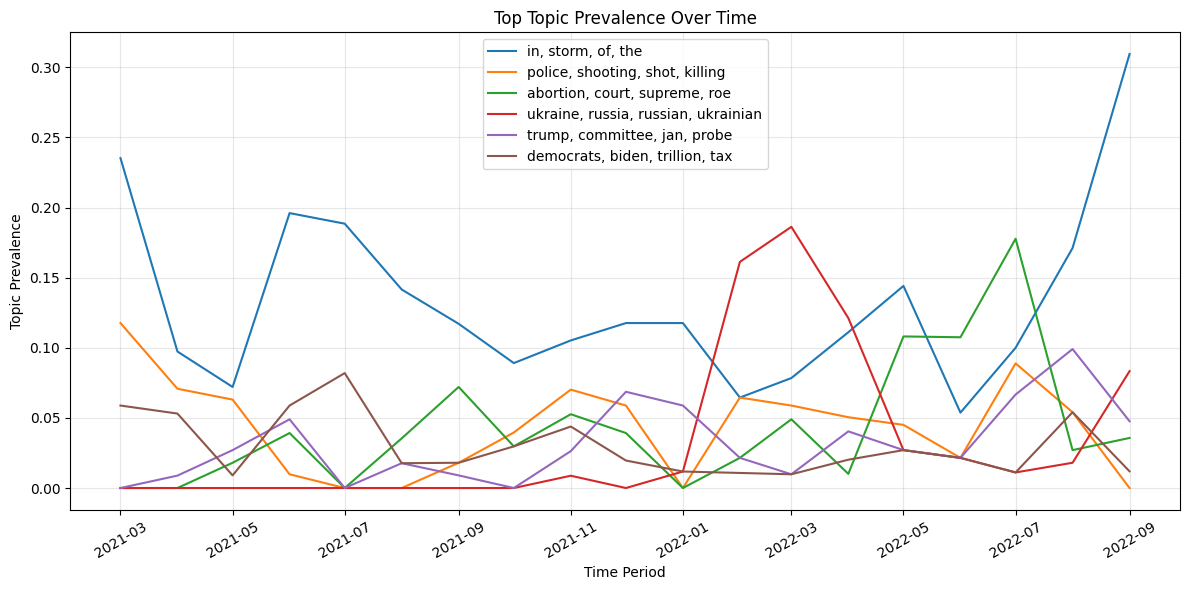

In [130]:
# ============================================
# 5A) PLOT PREVALENCE OF TOP-K TOPICS
# ============================================
plt.figure(figsize=(12,6))

for t in top_k_ids:
    label = topic_names[t]   # readable name
    plt.plot(pivot_norm.index, pivot_norm[t], label=label)

plt.xlabel("Time Period")
plt.ylabel("Topic Prevalence")
plt.title("Top Topic Prevalence Over Time")
plt.xticks(rotation=30)
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


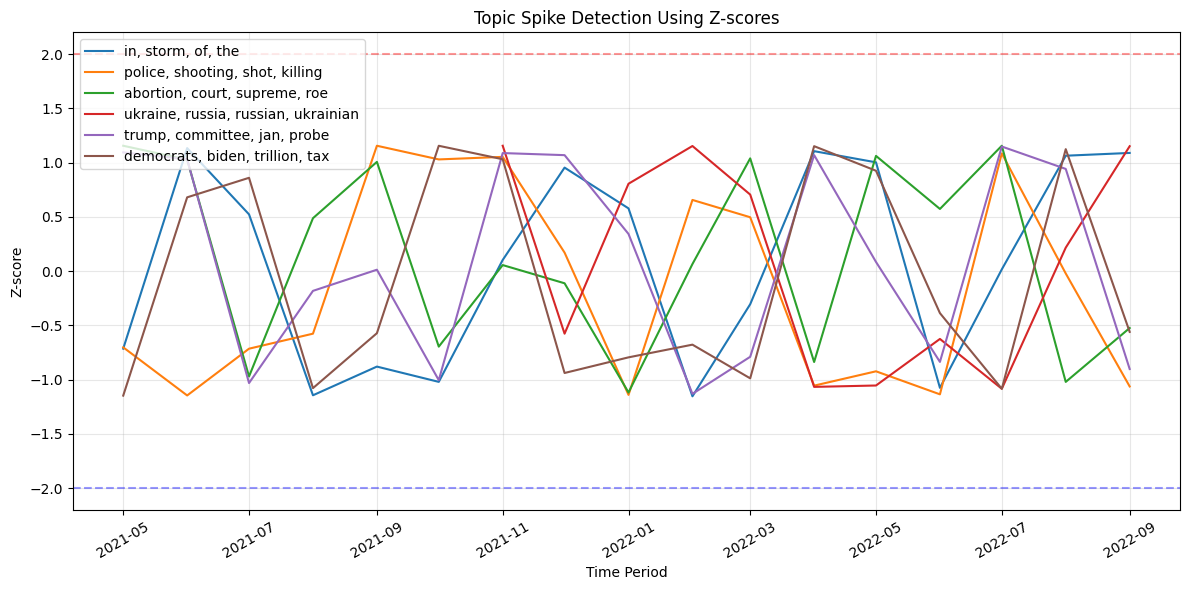

In [131]:
# ============================================
# 5B) Z-SCORE TREND SPIKES (Corrected Version)
# ============================================
plt.figure(figsize=(12,6))

for t in top_k_ids:     # use IDs for indexing
    plt.plot(zscore.index, zscore[t], label=topic_names[t])  # show readable names

plt.axhline(2, color='red', linestyle='--', alpha=0.4)   # spike threshold
plt.axhline(-2, color='blue', linestyle='--', alpha=0.4)

plt.xlabel("Time Period")
plt.ylabel("Z-score")
plt.title("Topic Spike Detection Using Z-scores")
plt.xticks(rotation=30)
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()
